# Regression

In [29]:
# Importing pandas
import pandas as pd

# Importing the course datasets 
diabetes = pd.read_csv('datasets/diabetes_clean.csv')
music = pd.read_csv('datasets/music_clean.csv')
advertising = pd.read_csv('datasets/advertising_and_sales_clean.csv')
telecom = pd.read_csv("datasets/telecom_churn_clean.csv")

# Diabets datasets

In [2]:
diabets_df = pd.read_csv("datasets/diabetes_clean.csv")
print(diabets_df.head())

   pregnancies  glucose  diastolic  triceps  ...   bmi    dpf  age  diabetes
0            6      148         72       35  ...  33.6  0.627   50         1
1            1       85         66       29  ...  26.6  0.351   31         0
2            8      183         64        0  ...  23.3  0.672   32         1
3            1       89         66       23  ...  28.1  0.167   21         0
4            0      137         40       35  ...  43.1  2.288   33         1

[5 rows x 9 columns]


## Creating features and target arrays

In [3]:
X = diabets_df.drop("glucose", axis=1).values
y = diabets_df["glucose"].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


## Making predictions from a single feature

In [5]:
X_bmi = X[:, 3]
print(y.shape, X_bmi.shape)

(768,) (768,)


In [6]:
X_bmi = X_bmi.reshape(-1,1)
print(X_bmi.shape)

(768, 1)


## Plotting glucose vs. body mass index

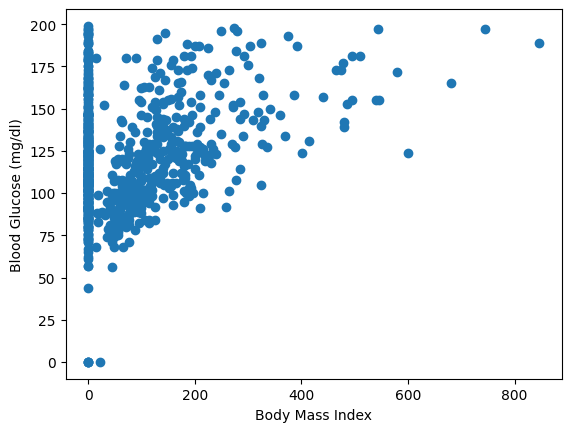

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

## Fitting a regression model

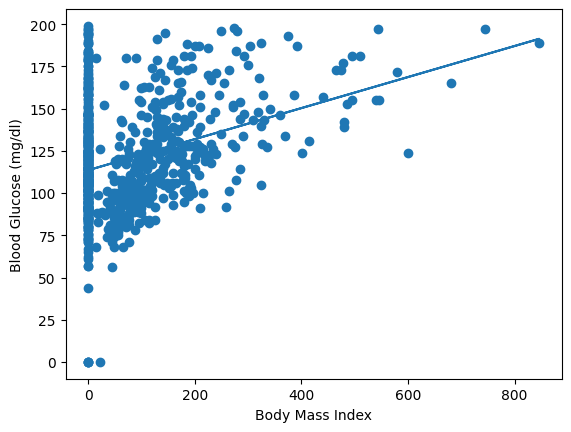

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi,y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi,y)
plt.plot(X_bmi, predictions)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

# Advertising and sales datasets

## Creating features

In [19]:
import pandas as pd

sales_df = pd.read_csv('datasets/advertising_and_sales_clean.csv')

import numpy as np

# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)


(4546, 1) (4546,)


## Building a linear regression model
Now we have created our feature and target arrays, we will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

In [20]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


## Visualizing a linear regression model
Now we have built your linear regression model and trained it using all available observations, we can visualize how well the model fits the data. This allows to us interpret the relationship between radio advertising expenditure and sales values.

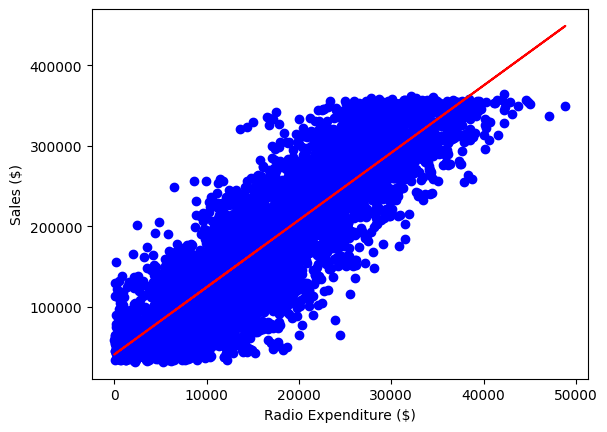

In [21]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

# Linear regression using all features

## R-squared in Scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

reg_all.score(X_test, y_test)

## RMSE in scikit-learn

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

45879.42086239429

## Fit and predict for regression

In [31]:
import pandas as pd

sales_df = pd.read_csv('datasets/advertising_and_sales_clean.csv')

In [ ]:
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

<script.py> output:
    Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]

## Regression performance

In [ ]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Create a LinearRegression object
reg = LinearRegression()

# Fit the model using X_train and y_train
reg.fit(X_train, y_train)

# Predict on the test data
y_pred = reg.predict(X_test)

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

<script.py> output:
    R^2: 0.9990165886162027
    RMSE: 2942.372219812037

## Cross-validation for R-squared
Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.

In [ ]:
# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

<script.py> output:
    [0.74451678 0.77241887 0.76842114 0.7410406  0.75170022 0.74406484]

## Analyzing cross-validation metrics
Now we have performed cross-validation, it's time to analyze the results.

In [ ]:
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

<script.py> output:
    0.7536937416666666
    0.012305386274436092
    [0.74141863 0.77191915]

### Ridge regression in scikit-learn

In [ ]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1,1.0,10.0,100.0,1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

## Losso regression in scikit-learn

In [ ]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.1,1.0,10.0,100.0,1000.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

## Lasso for feature selection in scikit-learn

In [ ]:
from sklearn.linear_model import Lasso
X = diabets_df.drop("glucose", axis=1).values
y = diabets_df["glucose"].values
names = diabets_df.drop("glucose", axis=1).columns
lasso = Lasso(alpha=0.1)
lasson_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xtricks(rotation=45)
plt.show()

## Regularized regression: Ridge
Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In [ ]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

<script.py> output:
    [0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]

## Lasso regression for feature importance

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

![resim_2023-04-13_181312355](resim_2023-04-13_181312355.png)
